<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regressão-Linear-Múltipla" data-toc-modified-id="Regressão-Linear-Múltipla-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regressão Linear Múltipla</a></span><ul class="toc-item"><li><span><a href="#Simulando-Dados" data-toc-modified-id="Simulando-Dados-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Simulando Dados</a></span><ul class="toc-item"><li><span><a href="#Duas-variáveis-continuas" data-toc-modified-id="Duas-variáveis-continuas-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Duas variáveis continuas</a></span></li><li><span><a href="#Simulando-Variáveis-Categóricas" data-toc-modified-id="Simulando-Variáveis-Categóricas-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Simulando Variáveis Categóricas</a></span><ul class="toc-item"><li><span><a href="#Convertendo-variáveis-categóricas-em-variáveis-dummy" data-toc-modified-id="Convertendo-variáveis-categóricas-em-variáveis-dummy-1.1.2.1"><span class="toc-item-num">1.1.2.1&nbsp;&nbsp;</span>Convertendo variáveis categóricas em variáveis dummy</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Voltamos-20h20" data-toc-modified-id="Voltamos-20h20-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Voltamos 20h20</a></span><ul class="toc-item"><li><span><a href="#Dados-Reais" data-toc-modified-id="Dados-Reais-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dados Reais</a></span></li><li><span><a href="#Exploração-de-Dados" data-toc-modified-id="Exploração-de-Dados-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Exploração de Dados</a></span></li><li><span><a href="#Criando-nossa-regressão" data-toc-modified-id="Criando-nossa-regressão-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Criando nossa regressão</a></span></li></ul></li><li><span><a href="#VOLTAMOS-21h15" data-toc-modified-id="VOLTAMOS-21h15-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>VOLTAMOS 21h15</a></span></li></ul></div>

In [1]:
import random
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Regressão Linear Múltipla

## Simulando Dados

Começaremos vendo como a entrada de múltiplas variáveis em uma regressão linear funciona a partir de conjuntos de dados sintéticos.

### Duas variáveis continuas

In [2]:
def simular_dado_mv(parametros_x1, parametros_x2, desvpad_E, samples):
    
    x1 = np.random.normal(loc=parametros_x1[0],
                          scale=parametros_x1[1],
                          size=samples)
    
    x2 = np.random.normal(loc=parametros_x2[0],
                          scale=parametros_x2[1],
                          size=samples)
    
    E = np.random.normal(loc=0, scale=desvpad_E, size=samples)
    
    y = parametros_x1[2] * x1 + parametros_x2[2] * x2 + E
    
    return pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

In [3]:
simular_dado_mv((2, 5, 10), (10, 8, 5), 12, 100)

,x1,x2,y
0,-3.882659,25.800732,85.901768
1,-1.040302,9.043098,33.660414
2,5.715843,5.929961,88.847534
3,0.502136,-3.062302,-4.502761
4,1.448399,-0.411917,1.963142
...,...,...,...
95,-0.923002,10.990221,40.654032
96,9.994075,1.234808,89.211851
97,1.225547,-0.072956,12.471792
98,-2.710716,15.867246,46.615772


Podemos criar um DataFrame com nossos dados simulados para utilizarmos nossas ferramentas de EDA buscando visualizar a relação entre X1, X2 e Y

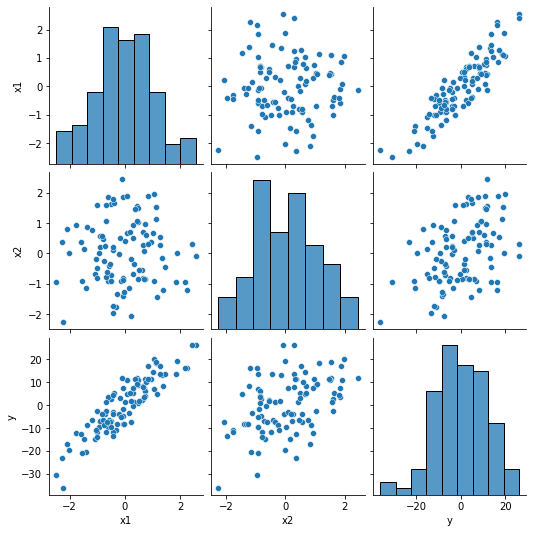

In [11]:
teste_mv = simular_dado_mv((0, 1, 10), (0, 1, 5), 1, 100)
sns.pairplot(teste_mv)

Agora, vamos utilizar nossa regressão para estimar os coeficientes associados à X1 e X2

In [12]:
X = sm.add_constant(teste_mv[['x1', 'x2']])
Y = teste_mv['y']
modelo = sm.OLS(Y, X)
lm_fit = modelo.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     6902.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):          2.63e-105
Time:                        19:48:34   Log-Likelihood:                -141.23
No. Observations:                 100   AIC:                             288.5
Df Residuals:                      97   BIC:                             296.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1817      0.101      1.799      0.075      -0.019       0.382
x1            10.1207      0.096    105.326      0.000       9.930      10.311
x2             4.8879      0.096     50.683      0.000       4.696       5.079
==============================================================================
Omnibus:                        2.333   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.311   Jarque-Bera (JB):                1.866
Skew:                           0.326   Prob(JB):                        0.393
Kurtosis:                       3.155   Cond. No.                         1.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Podemos utilizar a biblioteca `sklearn` para conseguir a interface preditiva desta biblioteca:

In [13]:
modelo = LinearRegression()

X = teste_mv[['x1', 'x2']]

y = teste_mv['y']

modelo.fit(X, y)

print(modelo.coef_)
print(modelo.intercept_)

[10.12073261  4.88787609]
0.18167804257410872


In [15]:
modelo.predict(teste_mv[['x1', 'x2']])

array([  6.27588316,  -6.28937976,  11.68717598, -33.69451502,
        17.15721132,   8.33701647,   2.83273062,   5.43834385,
       -13.13280563, -14.05074192,  -7.84700417,   7.68547163,
         2.32722845,  -5.72745021,  -1.95763367,  13.00931062,
        -8.29081056,   3.15021185,  -7.685836  , -29.6034992 ,
         4.13371907,  12.16670052,   3.39256037,   5.64855903,
         1.01806387,   9.85217105,   4.89275868, -11.46980754,
        -1.69524112,  -7.42587817, -12.79968032, -12.50332233,
        -3.53952206,  12.44681893,  13.81729238, -19.73473161,
       -10.26403995,  10.23118234,  -4.49898899,  12.67660233,
         8.10533725,  -7.6373765 ,  -5.67990242,   3.23900478,
        -2.33364495,  -9.09980984,   1.92097498,  -0.27857669,
        10.88223417, -10.69437261,  -4.63072939,  17.20107487,
        -9.12142794,  10.13974189,  25.67550227,  -9.53247028,
         1.03801618,   3.26994028,  17.42073722,  -8.23445296,
        20.42851373,   0.80647652,  17.95283855,   7.88

In [16]:
teste_mv['pred'] = modelo.predict(teste_mv[['x1', 'x2']])

In [17]:
teste_mv

,x1,x2,y,pred
0,1.045954,-0.918930,6.922857,6.275883
1,-0.913574,0.567727,-7.246401,-6.289380
2,0.959404,0.367363,11.258720,11.687176
3,-2.254047,-2.263476,-36.080209,-33.694515
4,2.257374,-1.201083,16.006228,17.157211
...,...,...,...,...
95,-1.564632,-0.923514,-20.766308,-20.167561
96,0.504757,-0.548304,1.687646,2.610147
97,-1.029974,-0.201482,-10.894607,-11.227231
98,0.216052,-0.176537,1.945367,1.505393


Agora, vamos comparar as relações de nossa variável resposta e variável prevista contra X1 e X2:

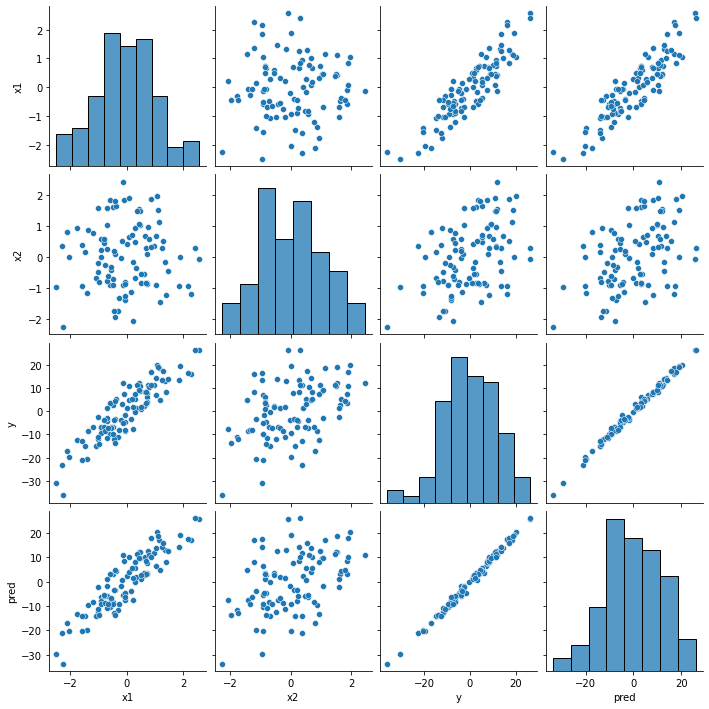

In [18]:
sns.pairplot(teste_mv)

### Simulando Variáveis Categóricas

Muitas variáveis que encontramos são **categóricas**, ou seja, não são numéricas. Vamos simular uma variável categórica com impacto linear sobre nossa variável Y:

In [19]:
def simular_dado_mv_cat(parametros_x1, categorias_dict, desvpad_E, samples):
    
    x1 = np.random.normal(loc=parametros_x1[0],
                          scale=parametros_x1[1],
                          size=samples)
    
    cat = random.choices(list(categorias_dict.keys()), k = samples)
    eff_cat = list(map(lambda x: categorias_dict[x], cat))
    
    E = np.random.normal(loc=0, scale=desvpad_E, size=samples)
    
    y = parametros_x1[2] * x1 + eff_cat + E
    return pd.DataFrame({'x1': x1, 'categoria': cat, 'y': y})

In [20]:
simular_dado_mv_cat((0, 1, 5), {'A' : 1, 'B' : 5, 'C' : 10}, 1, 100)

,x1,categoria,y
0,0.645793,B,10.116152
1,0.087213,A,2.111946
2,0.436640,A,4.840326
3,-0.504967,C,8.391566
4,0.414500,A,2.020361
...,...,...,...
95,1.396410,A,8.303878
96,0.466746,B,9.254842
97,-0.948891,A,-2.725097
98,-1.158274,A,-4.897902


In [21]:
teste_mv_cat = simular_dado_mv_cat((0, 1, 5), {'A' : 1, 'B' : 5, 'C' : 10}, 1, 100)

Podemos utilizar um BoxPlot para visualizar a relação entre nossa variável categórica e nossa variável resposta:

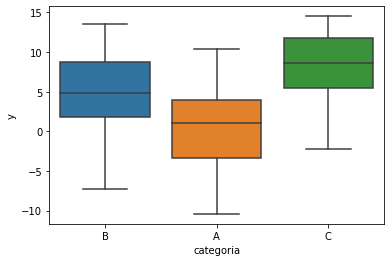

In [22]:
sns.boxplot(data = teste_mv_cat, x = 'categoria', y = 'y');

ou então alterar a cor dos pontos em um scatterplot, visualizando múltiplas relações ao mesmo tempo:

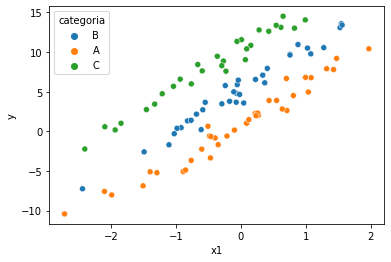

In [25]:
sns.scatterplot(data = teste_mv_cat, x = 'x1', y = 'y', hue = 'categoria');

In [26]:
teste_mv_cat

,x1,categoria,y
0,1.076503,B,9.771484
1,1.081456,A,6.769058
2,-0.596576,C,7.625061
3,-0.890395,A,-5.065678
4,1.427283,A,7.791117
...,...,...,...
95,-0.764308,C,5.987385
96,-0.363960,C,9.470446
97,0.700363,A,6.667793
98,-0.587418,B,2.720161


#### Convertendo variáveis categóricas em variáveis dummy

Para utilizarmos variáveis categóricas em um modelo, precisamos transforma-las em variáveis **numéricas**. A forma mais simples de fazê-lo é através de **variáveis dummies**: vamos criar **uma variável binaria nova para cada nível de nossa variável categórica**. Em cada variável, esta terá valor 1 quando a observação for daquela categoria e 0 caso não.

Podemos utilizar a função `get_dummies()` para construir as variáveis dummies associadas à uma variável categórica.

In [27]:
pd.get_dummies(teste_mv_cat['categoria'])

,A,B,C
0,0,1,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
95,0,0,1
96,0,0,1
97,1,0,0
98,0,1,0


In [28]:
teste_mv_cat.join(pd.get_dummies(teste_mv_cat['categoria']))

,x1,categoria,y,A,B,C
0,1.076503,B,9.771484,0,1,0
1,1.081456,A,6.769058,1,0,0
2,-0.596576,C,7.625061,0,0,1
3,-0.890395,A,-5.065678,1,0,0
4,1.427283,A,7.791117,1,0,0
...,...,...,...,...,...,...
95,-0.764308,C,5.987385,0,0,1
96,-0.363960,C,9.470446,0,0,1
97,0.700363,A,6.667793,1,0,0
98,-0.587418,B,2.720161,0,1,0


In [29]:
teste_mv_cat = teste_mv_cat.join(pd.get_dummies(teste_mv_cat['categoria']))

In [30]:
teste_mv_cat

,x1,categoria,y,A,B,C
0,1.076503,B,9.771484,0,1,0
1,1.081456,A,6.769058,1,0,0
2,-0.596576,C,7.625061,0,0,1
3,-0.890395,A,-5.065678,1,0,0
4,1.427283,A,7.791117,1,0,0
...,...,...,...,...,...,...
95,-0.764308,C,5.987385,0,0,1
96,-0.363960,C,9.470446,0,0,1
97,0.700363,A,6.667793,1,0,0
98,-0.587418,B,2.720161,0,1,0


In [32]:
X = sm.add_constant(teste_mv_cat[['x1', 'A' , 'B', 'C']])
Y = teste_mv_cat['y']
modelo = sm.OLS(Y, X)
lm_fit = modelo.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     1148.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):           4.80e-75
Time:                        20:02:44   Log-Likelihood:                -135.57
No. Observations:                 100   AIC:                             279.1
Df Residuals:                      96   BIC:                             289.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1359      0.074     56.079      0.000       3.989       4.282
x1             4.9113      0.099     49.507      0.000       4.714       5.108
A             -3.1340      0.133    -23.565      0.000      -3.398      -2.870
B              1.0907      0.136      8.028      0.000       0.821       1.360
C              6.1791      0.150     41.092      0.000       5.881       6.478
==============================================================================
Omnibus:                        0.098   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.952   Jarque-Bera (JB):                0.268
Skew:                          -0.029   Prob(JB):                        0.875
Kurtosis:                       2.753   Cond. No.                     1.27e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.77e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

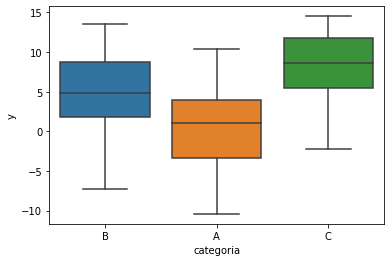

In [33]:
sns.boxplot(data = teste_mv_cat, x = 'categoria', y = 'y');

A nota 2 do resultado da StatsModels nos diz que temos um problema: nossos dados tem colinearidades! As variáveis dummy **A**, **B** e **C** não são **independentes** - tendo 2 podemos calcular a última.

Neste caso, o problema pode ser resolvido removendo um dos níveis da variável categórica:

In [34]:
X = sm.add_constant(teste_mv_cat[['x1', 'B', 'A']])
Y = teste_mv_cat['y']
modelo = sm.OLS(Y, X)
lm_fit = modelo.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     1148.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):           4.80e-75
Time:                        20:08:56   Log-Likelihood:                -135.57
No. Observations:                 100   AIC:                             279.1
Df Residuals:                      96   BIC:                             289.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3150      0.187     55.250      0.000       9.944      10.686
x1             4.9113      0.099     49.507      0.000       4.714       5.108
B             -5.0884      0.246    -20.644      0.000      -5.578      -4.599
A             -9.3131      0.243    -38.329      0.000      -9.795      -8.831
==============================================================================
Omnibus:                        0.098   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.952   Jarque-Bera (JB):                0.268
Skew:                          -0.029   Prob(JB):                        0.875
Kurtosis:                       2.753   Cond. No.                         4.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
teste_mv_cat['pred'] = lm_fit.predict(sm.add_constant(teste_mv_cat[['x1', 'B', 'A']]))

<AxesSubplot:xlabel='categoria', ylabel='pred'>

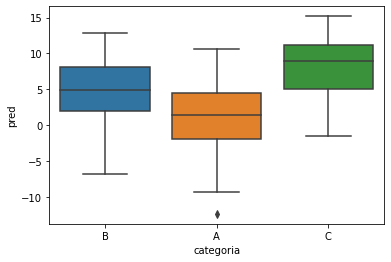

In [36]:
sns.boxplot(data = teste_mv_cat, x = 'categoria', y = 'pred')

<AxesSubplot:xlabel='categoria', ylabel='y'>

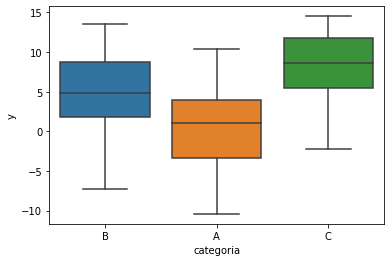

In [37]:
sns.boxplot(data = teste_mv_cat, x = 'categoria', y = 'y')

<AxesSubplot:xlabel='x1', ylabel='y'>

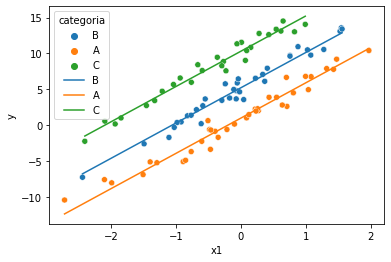

In [40]:
sns.scatterplot(data = teste_mv_cat, x = 'x1', y = 'y', hue = 'categoria')
sns.lineplot(data = teste_mv_cat, x = 'x1', y = 'pred', hue = 'categoria')

In [41]:
pd.get_dummies(teste_mv_cat['categoria'], drop_first = True)

,B,C
0,1,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
95,0,1
96,0,1
97,0,0
98,1,0


Como podemos interpretar o modelo acima a luz da exclusão da variável dummy de A?

# Voltamos 20h20

## Dados Reais

Vamos utilizar um conjunto de dados com valores de seguro cobrado por operadoras americanas. O objetivo deste dataset é ser uma introdução à regressão múltipla.


In [43]:
tb_insu = pd.read_csv('data/tb_insurance.csv')

In [44]:
tb_insu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [45]:
tb_insu.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## Exploração de Dados

In [46]:
tb_insu.select_dtypes(include = 'number')

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86
...,...,...,...,...
1333,50,31.0,3,10600.55
1334,18,31.9,0,2205.98
1335,18,36.9,0,1629.83
1336,21,25.8,0,2007.95


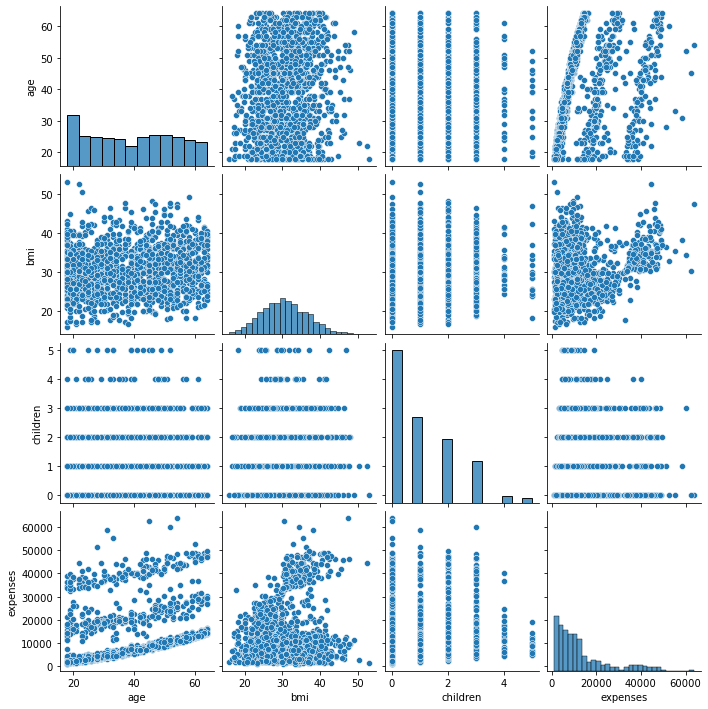

In [47]:
sns.pairplot(tb_insu.select_dtypes(include = 'number'))

<AxesSubplot:xlabel='region', ylabel='expenses'>

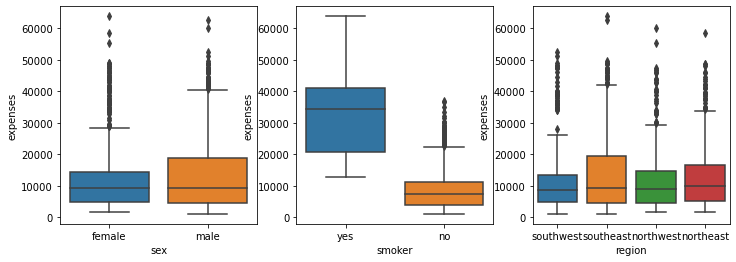

In [48]:
fig, ax = plt.subplots(1,3, figsize = (12,4))
sns.boxplot(data = tb_insu, x = 'sex', y = 'expenses', ax=ax[0])
sns.boxplot(data = tb_insu, x = 'smoker', y = 'expenses', ax=ax[1])
sns.boxplot(data = tb_insu, x = 'region', y = 'expenses', ax=ax[2])

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

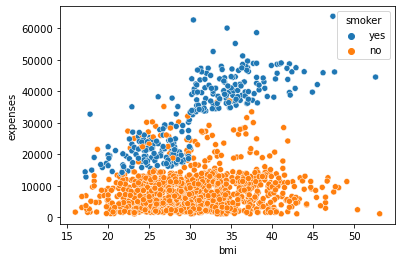

In [55]:
sns.scatterplot(data = tb_insu, x = 'bmi', y = 'expenses', hue = 'smoker')

In [56]:
tb_insu[tb_insu['smoker']=='yes']

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
11,62,female,26.3,0,yes,southeast,27808.73
14,27,male,42.1,0,yes,southeast,39611.76
19,30,male,35.3,0,yes,southwest,36837.47
23,34,female,31.9,1,yes,northeast,37701.88
...,...,...,...,...,...,...,...
1313,19,female,34.7,2,yes,southwest,36397.58
1314,30,female,23.7,3,yes,northwest,18765.88
1321,62,male,26.7,0,yes,northeast,28101.33
1323,42,female,40.4,2,yes,southeast,43896.38


<AxesSubplot:xlabel='bmi', ylabel='expenses'>

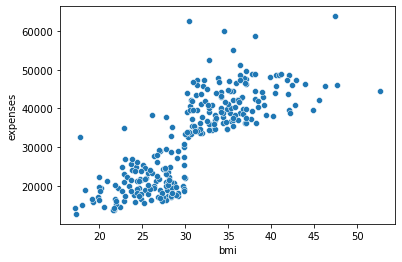

In [57]:
sns.scatterplot(data = tb_insu[tb_insu['smoker']=='yes'], x = 'bmi', y = 'expenses')

In [59]:
tb_insu[(tb_insu['smoker']=='yes') & (tb_insu['expenses']>45000)]['bmi'].min()

30.4

In [60]:
tb_insu['obese'] = np.where(tb_insu['bmi'] >= 30, 'yes', 'no')

In [65]:
tb_insu = tb_insu.join(pd.get_dummies(tb_insu['obese'], prefix = 'obese'))
tb_insu = tb_insu.join(pd.get_dummies(tb_insu['smoker'], prefix = 'smoker'))

In [66]:
tb_insu

,age,sex,bmi,children,smoker,region,expenses,obese,obese_no,obese_yes,smoker_no,smoker_yes
0,19,female,27.9,0,yes,southwest,16884.92,no,1,0,0,1
1,18,male,33.8,1,no,southeast,1725.55,yes,0,1,1,0
2,28,male,33.0,3,no,southeast,4449.46,yes,0,1,1,0
3,33,male,22.7,0,no,northwest,21984.47,no,1,0,1,0
4,32,male,28.9,0,no,northwest,3866.86,no,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,yes,0,1,1,0
1334,18,female,31.9,0,no,northeast,2205.98,yes,0,1,1,0
1335,18,female,36.9,0,no,southeast,1629.83,yes,0,1,1,0
1336,21,female,25.8,0,no,southwest,2007.95,no,1,0,1,0


In [67]:
tb_insu['obese_smoker'] = tb_insu['obese_yes'] * tb_insu['smoker_yes']

In [68]:
sm.add_constant(tb_insu[['obese_smoker', 'age', 'smoker_yes']])

,const,obese_smoker,age,smoker_yes
0,1.0,0,19,1
1,1.0,0,18,0
2,1.0,0,28,0
3,1.0,0,33,0
4,1.0,0,32,0
...,...,...,...,...
1333,1.0,0,50,0
1334,1.0,0,18,0
1335,1.0,0,18,0
1336,1.0,0,21,0


## Criando nossa regressão

Vamos utilizar as variáveis que criamos em nosso dataset para construir uma regressão linear para os valores dos seguros.

In [69]:
X = sm.add_constant(tb_insu[['obese_smoker', 'age', 'smoker_yes']])
y = tb_insu['expenses']


modelo = sm.OLS(y, X)
lm_fit = modelo.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     2698.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:48:31   Log-Likelihood:                -13169.
No. Observations:                1338   AIC:                         2.635e+04
Df Residuals:                    1334   BIC:                         2.637e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2129.6868    376.727     -5.653      0.000   -2868.728   -1390.645
obese_smoker  1.985e+04    552.094     35.950      0.000    1.88e+04    2.09e+04
age            268.2205      8.882     30.198      0.000     250.796     285.645
smoker_yes    1.335e+04    425.409     31.373      0.000    1.25e+04    1.42e+04
==============================================================================
Omnibus:                      848.452   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6895.404
Skew:                           2.992   Prob(JB):                         0.00
Kurtosis:                      12.375   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# VOLTAMOS 21h15

Vamos inserir as previsões do nosso modelo em nossa base de dados para visualizarmos as relações capturadas pela nossa regressão:

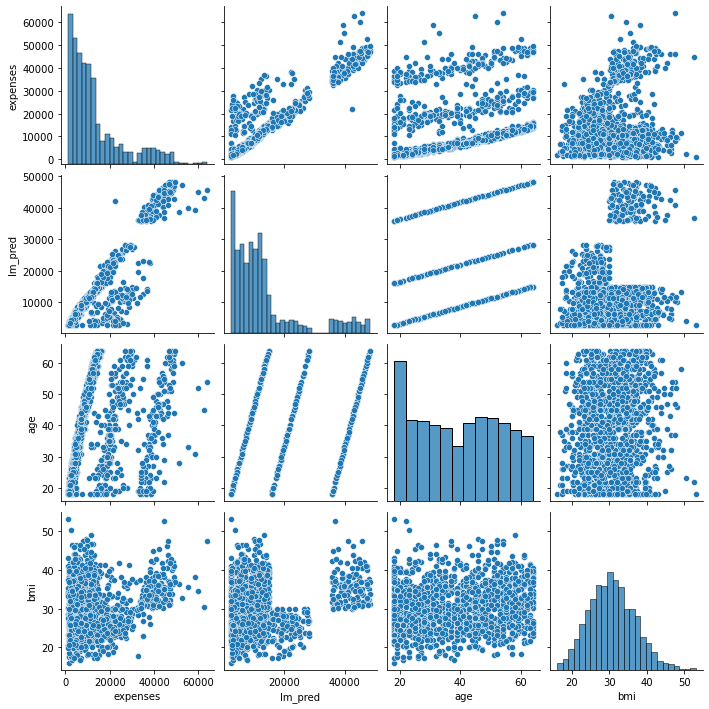

In [72]:
tb_insu['lm_pred'] = lm_fit.predict()
sns.pairplot(tb_insu[['expenses', 'lm_pred', 'age', 'bmi']])

<AxesSubplot:xlabel='age', ylabel='lm_pred'>

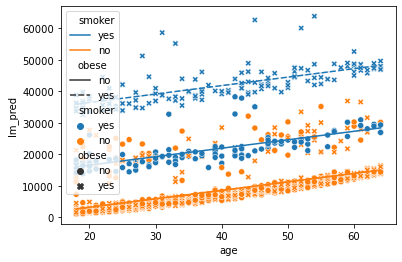

In [73]:
sns.lineplot(data = tb_insu, x = 'age', y='lm_pred', hue = 'smoker', style = 'obese')
sns.scatterplot(data = tb_insu, x = 'age', y='expenses', hue = 'smoker', style = 'obese')

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

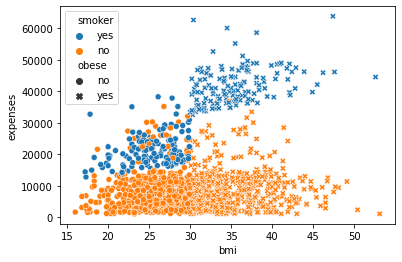

In [74]:
sns.scatterplot(data = tb_insu, x = 'bmi', y='expenses', hue = 'smoker', style = 'obese')

<AxesSubplot:xlabel='bmi', ylabel='lm_pred'>

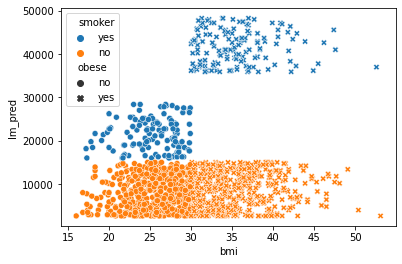

In [76]:
sns.scatterplot(data = tb_insu, x = 'bmi', y='lm_pred', hue = 'smoker', style = 'obese')